In [99]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [100]:
# importing dataset
data_train = pd.read_csv('Google-Train.csv')

In [101]:
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [102]:
data_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4.413000e+03
mean,685.051506,691.582124,678.172342,685.057189,685.057189,6.464731e+06
std,634.001195,639.981939,627.719598,634.049735,634.049735,7.699766e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.378372,250.375381,244.984985,247.962967,247.962967,1.698700e+06
50%,432.582581,435.730743,428.698700,433.143158,433.143158,3.796200e+06
75%,997.890015,1005.789978,987.940002,996.119995,996.119995,8.048344e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [103]:
train_set = data_train.iloc[: , 1:2].values

In [104]:
print(train_set)

[[  50.050049]
 [  50.555557]
 [  55.430431]
 ...
 [2499.070068]
 [2671.040039]
 [2661.      ]]


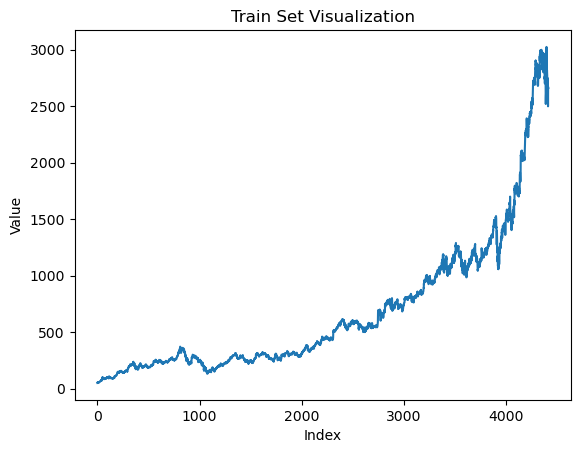

In [105]:
# Visualizing the training set
plt.plot(train_set)
plt.title('Train Set Visualization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [106]:
# feature scaling by normalizing 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
train_set_scaled = sc.fit_transform(train_set)

In [107]:
print(train_set_scaled)

[[1.36253641e-04]
 [3.06152003e-04]
 [1.94456941e-03]
 ...
 [8.23237943e-01]
 [8.81036072e-01]
 [8.77661672e-01]]


In [108]:
# creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(40,4413):
    X_train.append(train_set_scaled[i-40:i,0])
    y_train.append(train_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [109]:
print(X_train)

[[1.36253641e-04 3.06152003e-04 1.94456941e-03 ... 5.92959055e-03
  7.42334490e-03 7.03476678e-03]
 [3.06152003e-04 1.94456941e-03 2.02699418e-03 ... 7.42334490e-03
  7.03476678e-03 7.69417037e-03]
 [1.94456941e-03 2.02699418e-03 9.70602048e-04 ... 7.03476678e-03
  7.69417037e-03 7.40315706e-03]
 ...
 [9.79740225e-01 9.69042317e-01 9.69375047e-01 ... 8.80464728e-01
  8.56070977e-01 8.68240939e-01]
 [9.69042317e-01 9.69375047e-01 9.65046192e-01 ... 8.56070977e-01
  8.68240939e-01 8.23237943e-01]
 [9.69375047e-01 9.65046192e-01 9.58357948e-01 ... 8.68240939e-01
  8.23237943e-01 8.81036072e-01]]


In [110]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

# Initializing the RNN

In [111]:
rnn =  Sequential()
rnn.add(LSTM(units= 128, return_sequences= True, input_shape = (X_train.shape[1],1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units= 128, return_sequences= True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units= 128, return_sequences= True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units= 128, return_sequences= True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units= 128))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1))

In [112]:
# compling the RNN
rnn.compile(optimizer='adam', loss='mean_squared_error')

In [113]:
rnn.fit(X_train,y_train, epochs= 100, batch_size =32)

Epoch 1/100
137/137 [==============================] - 23s 87ms/step - loss: 0.0065
Epoch 2/100
137/137 [==============================] - 12s 86ms/step - loss: 8.2037e-04
Epoch 3/100
137/137 [==============================] - 12s 86ms/step - loss: 0.0010
Epoch 4/100
137/137 [==============================] - 12s 86ms/step - loss: 7.8483e-04
Epoch 5/100
137/137 [==============================] - 12s 86ms/step - loss: 7.6341e-04
Epoch 6/100
137/137 [==============================] - 12s 86ms/step - loss: 8.4310e-04
Epoch 7/100
137/137 [==============================] - 12s 86ms/step - loss: 7.0950e-04
Epoch 8/100
137/137 [==============================] - 12s 86ms/step - loss: 9.5186e-04
Epoch 9/100
137/137 [==============================] - 12s 86ms/step - loss: 7.8044e-04
Epoch 10/100
137/137 [==============================] - 12s 86ms/step - loss: 5.2479e-04
Epoch 11/100
137/137 [==============================] - 12s 86ms/step - loss: 7.4672e-04
Epoch 12/100
137/137 [================

In [114]:
# Test set
data_test = pd.read_csv("Google-Test.csv")
real_stock_price = data_test.iloc[:, 1:2].values

In [115]:
# Predicting the stock price
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs = data_total[len(data_total) - len(data_test)-40:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(40,58):
    X_test.append(inputs[i-40:i,0])
X_test =  np.array(X_test)
X_test =  np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [116]:
print(predicted_stock_price)

[[2681.8574]
 [2695.4028]
 [2700.7864]
 [2707.872 ]
 [2699.2195]
 [2686.2964]
 [2654.904 ]
 [2652.784 ]
 [2657.5564]
 [2672.9563]
 [2668.6082]
 [2647.3064]
 [2645.3113]
 [2659.3782]
 [2674.609 ]
 [2697.4028]
 [2712.5815]
 [2732.9377]]


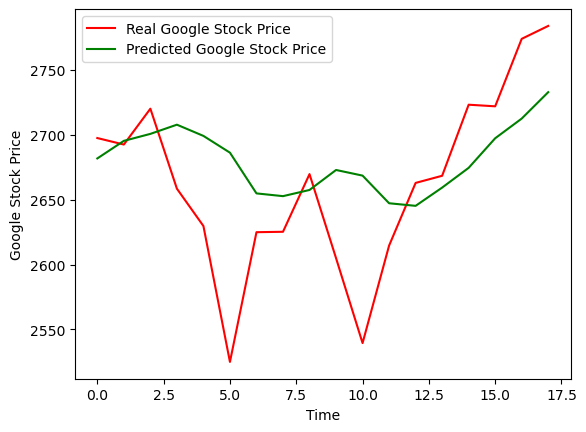

In [117]:
# Visualizing the result
plt.plot(real_stock_price, color = 'red' , label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = 'green', label = "Predicted Google Stock Price")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()